 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [490]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [491]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [492]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [493]:
# Drop nulls
whale_df_dropped_nulls = whale_returns_df.dropna().copy()
whale_df_dropped_nulls

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [494]:
whale_df_dropped_nulls.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [495]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [496]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [497]:
# Drop nulls
algo_df_dropped_nulls = algo_returns_df.dropna().copy()
algo_df_dropped_nulls

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [498]:
algo_df_dropped_nulls.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [499]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [500]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [501]:
# Fix Data Types
sp500_history_df.Close = [x.strip('$') for x in sp500_history_df.Close]

sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [502]:
sp500_history_df.dtypes
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)
sp500_history_df.Close

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [503]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [504]:
# Drop nulls
sp500_returns_df.isnull().sum()

Close    1
dtype: int64

In [505]:
sp500_returns_droppednulls_df = sp500_returns_df.dropna().copy()
sp500_returns_droppednulls_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [506]:
sp500_returns_droppednulls_df.isnull().sum()

Close    0
dtype: int64

In [507]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_droppednulls_df.columns = ['S&P 500']
sp500_returns_droppednulls_df 

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [508]:
sp500_returns_droppednulls_df.loc['2015-03-03']

S&P 500   -0.004539
Name: 2015-03-03 00:00:00, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [509]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df_dropped_nulls, algo_df_dropped_nulls, sp500_returns_droppednulls_df], axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

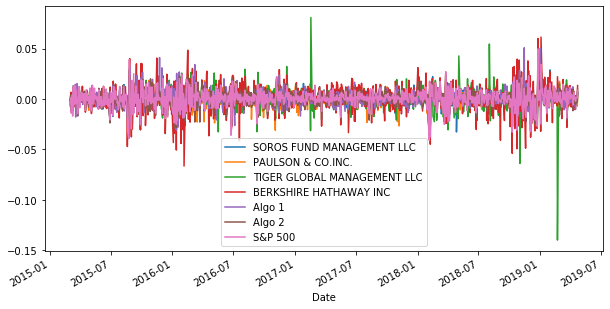

In [510]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [511]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1 + whale_df_dropped_nulls).cumprod() - 1
whale_cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466


In [512]:
algo_cumulative_returns = (1 + algo_df_dropped_nulls).cumprod() - 1
algo_cumulative_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852


In [513]:
sp500_cumulative_returns = (1 + sp500_returns_droppednulls_df).cumprod() - 1
sp500_cumulative_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.004500
2012-10-04,0.011707
2012-10-05,0.011381
2012-10-08,0.007885


In [514]:
combined_cumulative_returns_df = (1 + combined_returns_df).cumprod() - 1
combined_cumulative_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


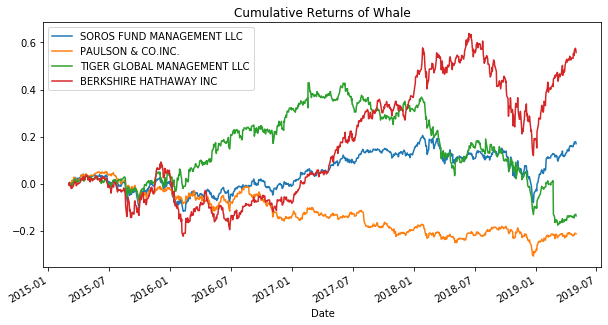

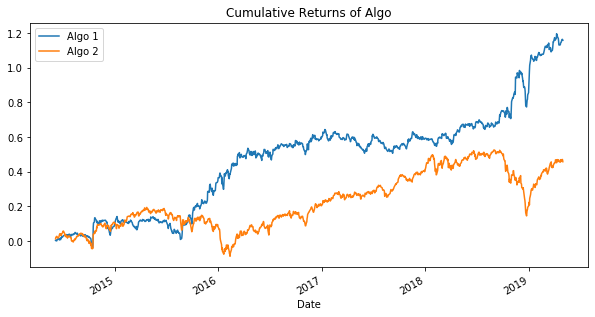

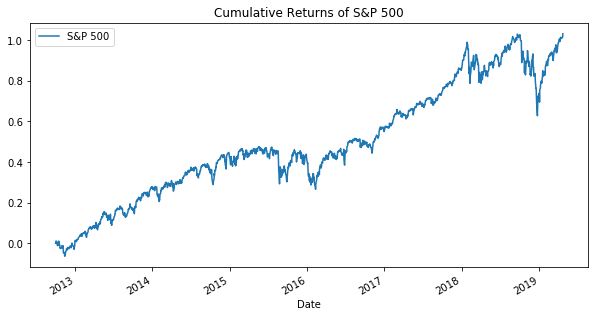

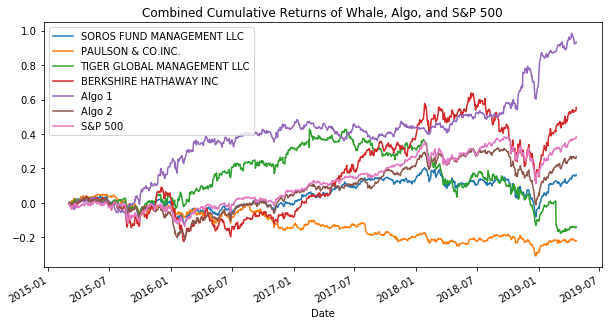

In [515]:
# Plot cumulative returns
whale_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Whale")
algo_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Algo")
sp500_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of S&P 500")
combined_cumulative_returns_df.plot(figsize=(10,5), title="Combined Cumulative Returns of Whale, Algo, and S&P 500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


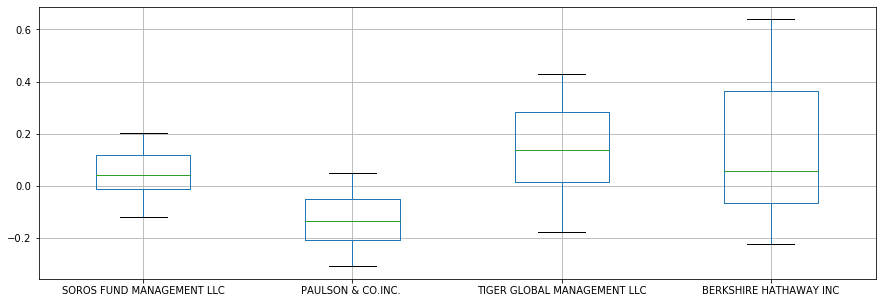

In [516]:
# Box plot to visually show risk
whale_cumulative_returns.boxplot(figsize=(15,5))

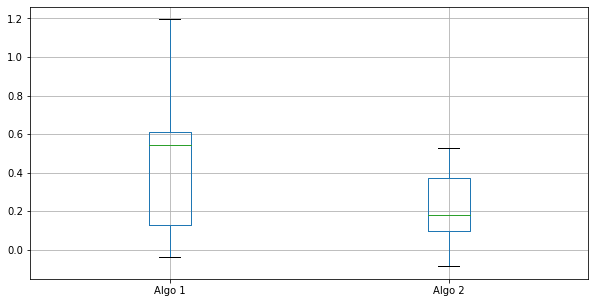

In [517]:
algo_cumulative_returns.boxplot(figsize=(10,5))

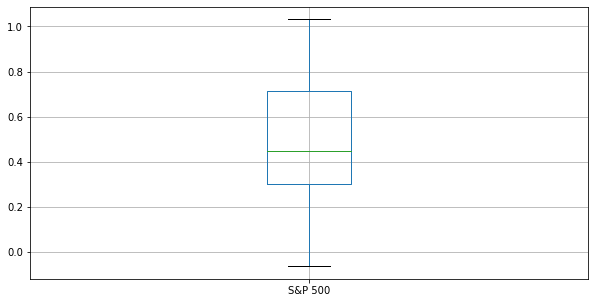

In [518]:
sp500_cumulative_returns.boxplot(figsize=(10,5))

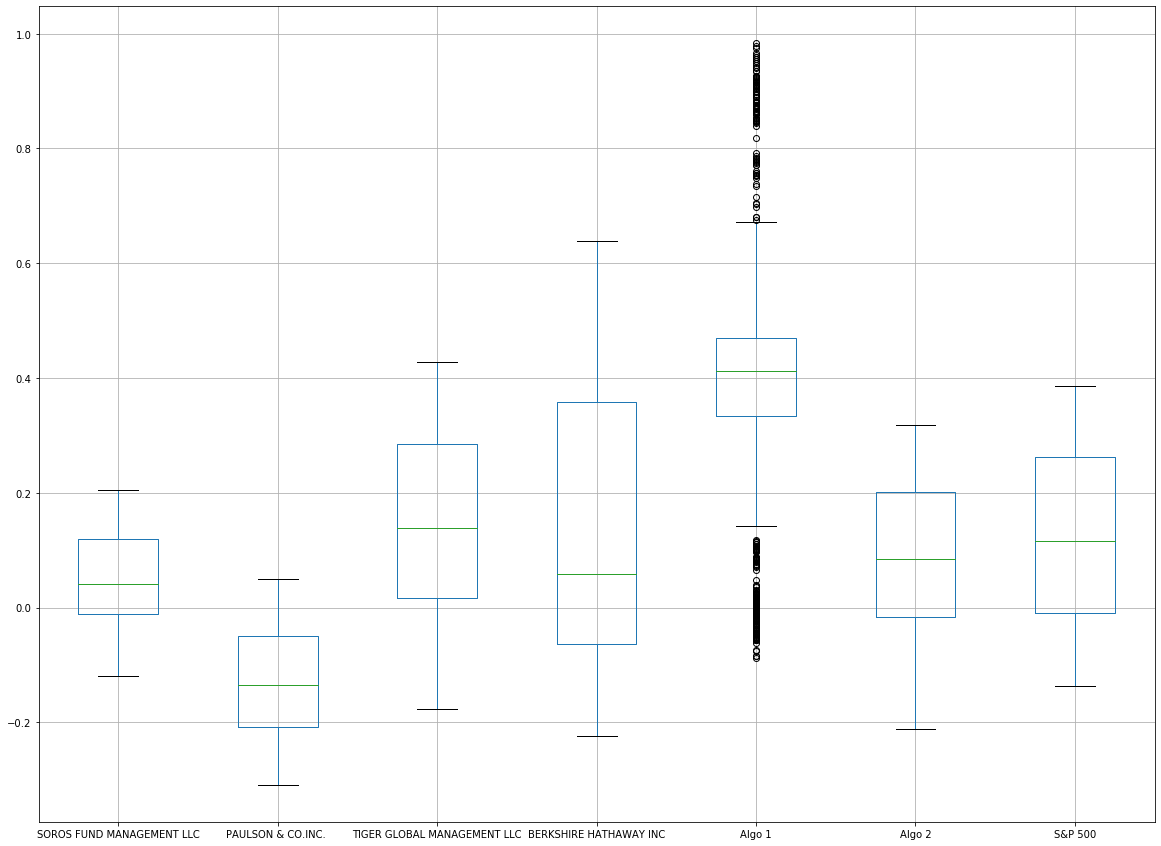

In [519]:
combined_cumulative_returns_df.boxplot(figsize=(20,15))

### Calculate Standard Deviations

In [520]:
# Calculate the daily standard deviations of all portfolios
#whale_volatility_df = whale_df_dropped_nulls.std()
#print(whale_volatility_df)
combined_daily_returns_risk_df = combined_returns_df.std()
combined_daily_returns_risk_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [521]:
# Calculate  the daily standard deviation of S&P 500
combined_daily_returns_risk_df['S&P 500']

0.008553731597758204

In [522]:
# Determine which portfolios are riskier than the S&P 500

Riskier_Portfolios_df = (combined_daily_returns_risk_df[combined_daily_returns_risk_df>combined_daily_returns_risk_df['S&P 500']])
print(f" The risk of the S&P 500 is:{combined_daily_returns_risk_df['S&P 500']}.\n The following Portfolios are Riskier than the S&P 500: ")
Riskier_Portfolios_df


 The risk of the S&P 500 is:0.008553731597758204.
 The following Portfolios are Riskier than the S&P 500: 


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [523]:
# Calculate the annualized standard deviation (252 trading days)
#Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (trading days)
#So, if standard deviation of daily returns were 2%, and the number of trading days 250, the annualized volatility will be = 2%*Sqrt(250) = 31.6%
ann_variance_df = ((combined_daily_returns_risk_df) * np.sqrt(252))
ann_variance_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [524]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_df.rolling(window=21).std().tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-09,0.006459,0.005983,0.008014,0.009508,0.005996,0.007355,0.006566
2019-04-10,0.006725,0.006199,0.007978,0.009533,0.006075,0.007559,0.006572
2019-04-11,0.006732,0.006270,0.007757,0.009548,0.005801,0.007583,0.006465
2019-04-12,0.006775,0.006272,0.007568,0.009307,0.005339,0.007479,0.006544
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006517
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094


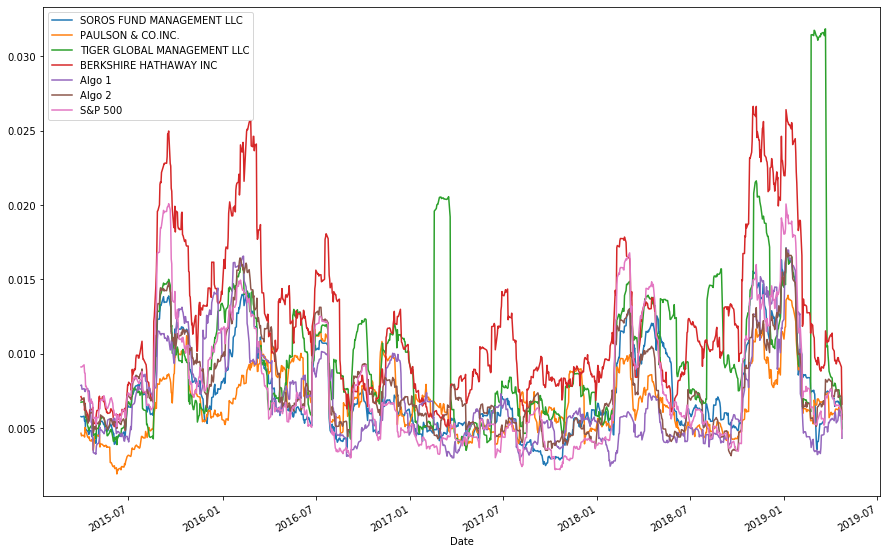

In [525]:

# Plot the rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

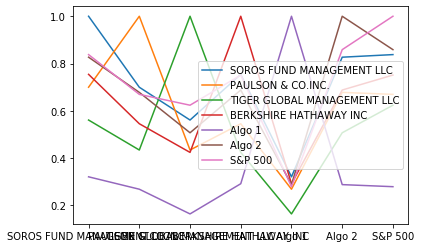

In [526]:
# Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
# Display de correlation matrix
correlation_combined_returns_df= combined_returns_df.corr()
correlation_combined_returns_df.plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [527]:

#3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500
# Calculate covariance of a single portfolio
Soros_covariance = combined_returns_df['SOROS FUND MANAGEMENT LLC'].cov(combined_returns_df['S&P 500'])
Soros_covariance


5.658503197203636e-05

In [528]:
# Calculate variance of S&P 500
SP500_variance = combined_returns_df['S&P 500'].var()
SP500_variance

7.316632424648712e-05

In [529]:
#3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500
# Computing beta.  beta=cov/var ; rolling beta= rollingcov/rollingvar
Soros_beta = Soros_covariance/SP500_variance
Soros_beta 

0.7733753547794652

In [530]:
#3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500
# Computing beta.  beta=cov/var ; rolling beta= rollingcov/rollingvar
# Plot beta trend
rolling_covariance = combined_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_df['S&P 500'])
rolling_variance = combined_returns_df['S&P 500'].rolling(window=60).var()


In [531]:
rolling_variance = combined_returns_df['S&P 500'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

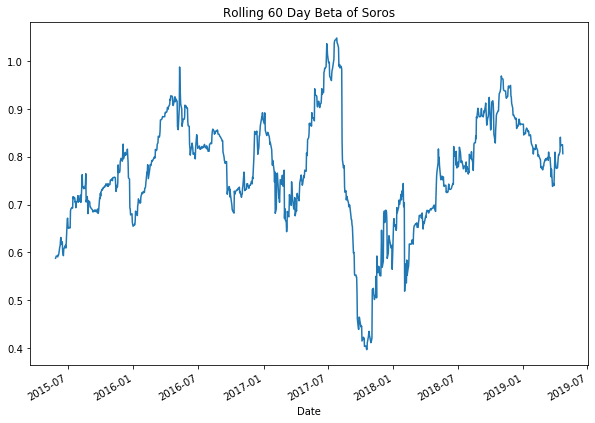

In [532]:
rolling_beta = rolling_covariance/rolling_variance
rolling_beta
rolling_beta.plot(figsize = (10,7),title = 'Rolling 60 Day Beta of Soros')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [533]:
# Use `ewm` to calculate the rolling window
exp_weighted_moving_avg = combined_returns_df.ewm(halflife=21)
exp_weighted_moving_avg

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [534]:
# Annualized Sharpe Ratios
sharpe_df = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_df 

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

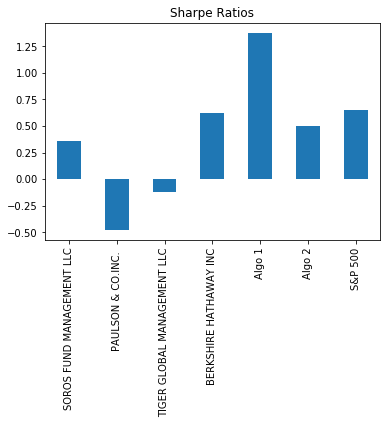

In [535]:
# Visualize the sharpe ratios as a bar plot
sharpe_df.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# Based on the Sharpe ratio data it is apparant that Algo1 outperforms all of the other funds including the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [536]:
# Reading data from 1st stock
goog_data = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [537]:
# Reading data from 2nd stock
aapl_data = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [538]:
# Reading data from 3rd stock
cost_data = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [539]:
# Combine all stocks in a single DataFrame
custom_stocks = pd.concat([goog_df, aapl_df, cost_df], axis = 1, join = "inner")
custom_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [540]:
custom_stocks.reset_index(inplace=True)
custom_stocks.head()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
1,2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2,2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
3,2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
4,2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [541]:
# Reorganize portfolio data by having a column per symbol
reorganized_returns_df = pd.pivot_table(custom_stocks, index = ['Trade DATE'], values = ['NOCP'])
reorganized_returns_df.columns = ['GOOG', 'AAPL', 'COST']
reorganized_returns_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [542]:
# Calculate daily returns
custom_returns_df = reorganized_returns_df.pct_change()
custom_returns_df.head()

# Drop NAs
custom_returns_df.isnull().sum()
custom_returns_droppednull_df = custom_returns_df.dropna().copy()
# Display sample data
custom_returns_droppednull_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [543]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weights = [1/3, 1/3, 1/3]
weighted_returns_df = custom_returns_droppednull_df.dot(weights)

# Display sample data
weighted_returns_df.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [544]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns = pd.concat([custom_returns_droppednull_df, combined_returns_df], axis = 1, join = "inner")
joined_returns.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001766,-0.002333,0.000613,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [545]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns.isnull().sum()

GOOG                           0
AAPL                           0
COST                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [546]:
# Calculate the annualized `std`
joined_returns_daily_stddev_df = joined_returns.std()
joined_returns_daily_stddev_df.head()

GOOG                         0.016095
AAPL                         0.018706
COST                         0.013357
SOROS FUND MANAGEMENT LLC    0.009240
PAULSON & CO.INC.            0.007353
dtype: float64

In [547]:
annual_std_dev_df = ((joined_returns_daily_stddev_df) * np.sqrt(252))
annual_std_dev_df.head()

GOOG                         0.255500
AAPL                         0.296951
COST                         0.212034
SOROS FUND MANAGEMENT LLC    0.146675
PAULSON & CO.INC.            0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

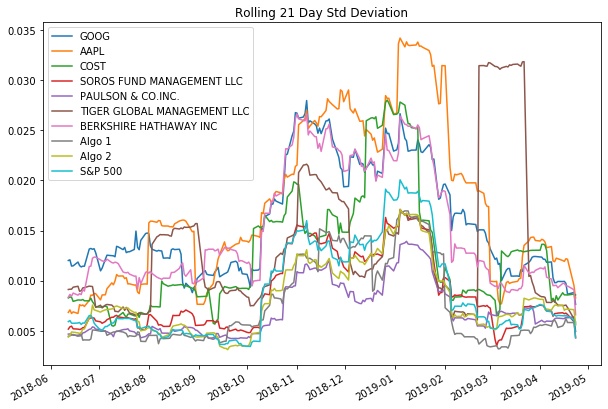

In [548]:
# Calculate rolling standard deviation
rolling_standard_all = joined_returns.rolling(window=21).std()
rolling_standard_all.tail(10)
# Plot rolling standard deviation
rolling_standard_all.plot(figsize = (10,7),title = 'Rolling 21 Day Std Deviation')

### Calculate and plot the correlation

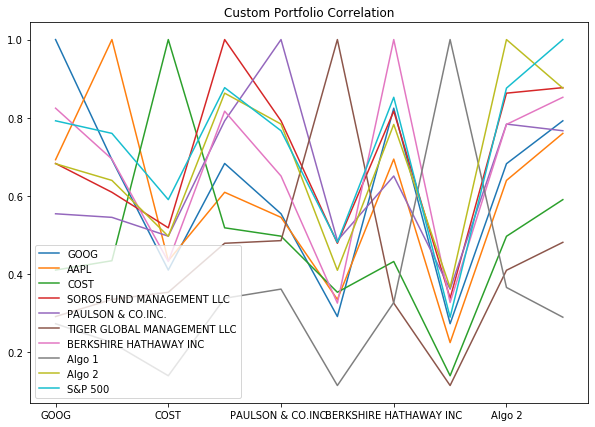

In [549]:
# Calculate and plot the correlation

custom_correlation_df= joined_returns.corr()
custom_correlation_df.plot(figsize = (10,7),title = 'Custom Portfolio Correlation')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [550]:
# Calculate and plot Beta
GOOG_rolling_cov= joined_returns['GOOG'].rolling(window=60).cov(joined_returns['S&P 500'])
custom_rolling_var_SP500 = joined_returns['S&P 500'].rolling(window=60).var()
GOOG_rolling_beta = GOOG_rolling_cov / custom_rolling_var_SP500
GOOG_rolling_beta

2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    1.352755
2019-04-17    1.290265
2019-04-18    1.289913
2019-04-22    1.287190
2019-04-23    1.275512
Length: 237, dtype: float64

In [551]:
AAPL_rolling_cov= joined_returns['AAPL'].rolling(window=60).cov(joined_returns['S&P 500'])
custom_rolling_var_SP500 = joined_returns['S&P 500'].rolling(window=60).var()
AAPL_rolling_beta = AAPL_rolling_cov / custom_rolling_var_SP500
AAPL_rolling_beta

2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    1.579042
2019-04-17    1.527550
2019-04-18    1.528001
2019-04-22    1.526811
2019-04-23    1.466646
Length: 237, dtype: float64

In [552]:
COST_rolling_cov= joined_returns['COST'].rolling(window=60).cov(joined_returns['S&P 500'])
custom_rolling_var_SP500 = joined_returns['S&P 500'].rolling(window=60).var()
COST_rolling_beta = COST_rolling_cov / custom_rolling_var_SP500
COST_rolling_beta


2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    0.588924
2019-04-17    0.596584
2019-04-18    0.597739
2019-04-22    0.599822
2019-04-23    0.645453
Length: 237, dtype: float64

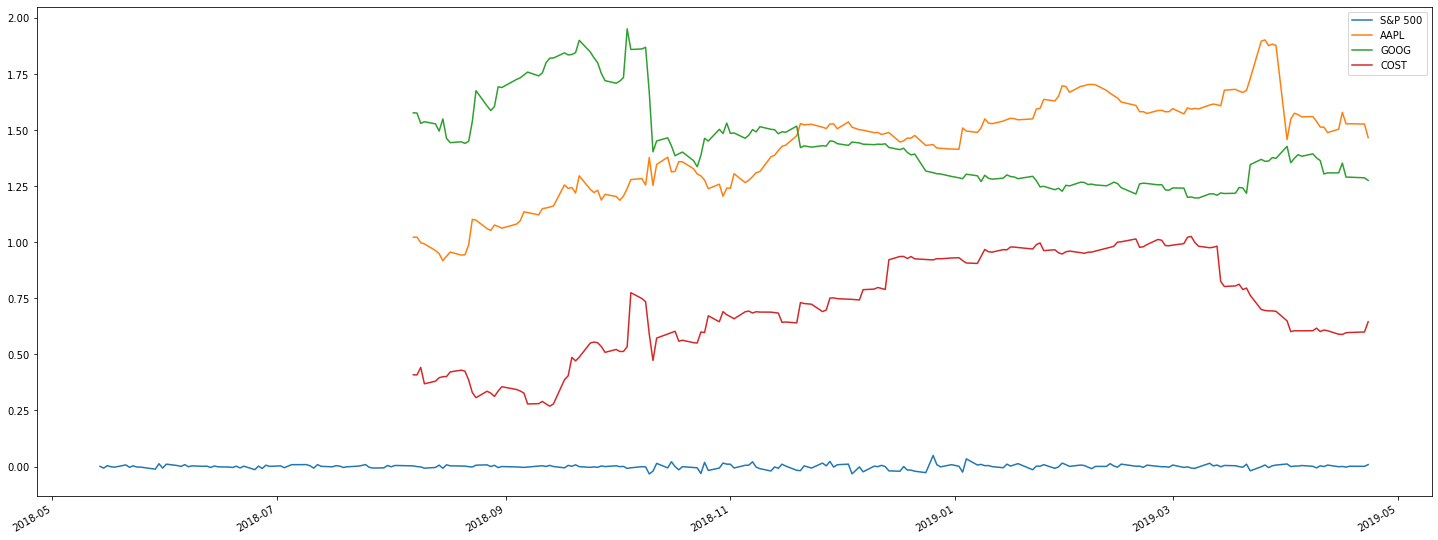

In [553]:
# Set figure of the daily closing prices of ROLLING BETA FOR CUSTOM
ax = joined_returns['S&P 500'].plot(figsize=(25,10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
AAPL_rolling_beta.plot(ax=ax)
GOOG_rolling_beta.plot(ax=ax)
COST_rolling_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["S&P 500", "AAPL", "GOOG", "COST"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [554]:
# Calculate Annualzied Sharpe Ratios
custom_sharpe_df = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))
custom_sharpe_df 

GOOG                           0.714034
AAPL                           0.490850
COST                           1.244419
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

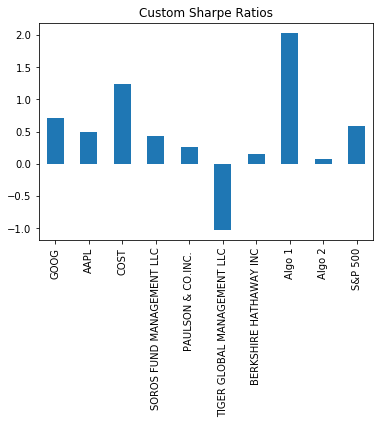

In [555]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_df.plot(kind = 'bar', title = 'Custom Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
All of the stocks in my portfolio are outperforming the whale stocks (except Algo1).  However, Costco has a sharpe ratio above 1.o indicating that it is performing well.